# Tensor Basics

In [ ]:
import torch
import numpy as np

In [ ]:
x = torch.ones(2, 2, dtype = torch.float16)
print(x.size())

torch.Size([2, 2])


In [ ]:
y = torch.tensor([2.5, 0.1])
print(y)

tensor([2.5000, 0.1000])


In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)
z = x + y
print(z)
z = torch.add(x, y)
print(z)
z = toch.sub(x, y)
print(z)
z = torch.mul(x, y)
print(z)
z = torch.div(x, y)
print(z)

# inplace change / changes elements of y
# pytorch every function with an underscore does an inplace operation
y.add_(x)
print(y)

tensor([[0.5965, 0.6533],
        [0.4517, 0.7323]])
tensor([[0.5823, 0.1146],
        [0.6007, 0.8291]])
tensor([[1.1788, 0.7679],
        [1.0524, 1.5614]])
tensor([[1.1788, 0.7679],
        [1.0524, 1.5614]])


In [ ]:
# slicing
x = torch.rand(5, 3)
print(x)
print(x[:, 0]) # row, col

# tensor with one element can have the .item() method to get the actual item
print(x[1, 1].item()) 

# reshaping
x = torch.rand(4,4)
print(x)
y = x.view(16) # size of 1D element
print(y)
y = x.view(-1, 8) # specifies only 2nd dimension -> 2x8 tensor
print(y.size())

tensor([[0.4251, 0.3038, 0.0994],
        [0.0485, 0.8233, 0.2046],
        [0.1046, 0.1344, 0.5470],
        [0.4221, 0.4508, 0.5154],
        [0.6068, 0.2856, 0.6051]])
tensor([0.4251, 0.0485, 0.1046, 0.4221, 0.6068])
0.8233271241188049
tensor([[0.3772, 0.5186, 0.3041, 0.4402],
        [0.3500, 0.5268, 0.7473, 0.7383],
        [0.0083, 0.8545, 0.0895, 0.4507],
        [0.4505, 0.9092, 0.9445, 0.7383]])
tensor([0.3772, 0.5186, 0.3041, 0.4402, 0.3500, 0.5268, 0.7473, 0.7383, 0.0083,
        0.8545, 0.0895, 0.4507, 0.4505, 0.9092, 0.9445, 0.7383])
torch.Size([2, 8])


In [ ]:
# conversion
a = torch.ones(5)
print(a)
b = a.numpy()
print(type(b))

a.add_(1) # inplace operation
print(a) # both point to the same memory location
print(b) # both point to the same memory location

# np to torch
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)


tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [ ]:
# GPU operations

if torch.cuda.is_available():
  device = torch.device("cuda")
  x = torch.ones(5, device = device)
  y = torch.ones(5)
  y = y.to(device)
  z = x + y # performed on GPU
  # z.numpy() # returns error since numpy can only operate on a CPU -> move first to CPU
  z = z.to("cpu")

# Gradient Calculation with Autograd

In [ ]:
import torch

In [ ]:
x = torch.randn(3, requires_grad=True) # creates a computational graph
print(x)

y = x+2 
print(y) # grad_fn=<AddBackward0>

z = y * y * 2
#z = z.mean()
print(z)

v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32)
z.backward(v) # dz / dx
print(x.grad)

# prevent from tracking the gradient
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad()

with torch.no_grad():
  y = x+1
  print(y)

tensor([ 1.5047, -0.5595,  2.1064], requires_grad=True)
tensor([3.5047, 1.4405, 4.1064], grad_fn=<AddBackward0>)
tensor([24.5656,  4.1498, 33.7256], grad_fn=<MulBackward0>)
tensor([1.4019, 5.7618, 0.0164])
tensor([2.5047, 0.4405, 3.1064])


In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()

  model_output.backward() # will accumulate the gradients
 
  print(weights.grad)

  weights.grad.zero_() # is required! otherwise accumulation of the gradients


optimizer = torch.optim.SGD(weights, lr = 0.01)
optimizer.step()
optimizer.zero_grad() # is required!

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Backpropagation

In [ ]:
import torch

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

y_hat = w * x
loss = (y_hat - y) ** 2

print(loss)

loss.backward()
print(w.grad)

## update weights

## forward pass

# Gradient Descent with Autograd and Backpropagation

### Numpy Implementation (Manually)

In [ ]:
import numpy as np

#f = w * x

#f = 2*x

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
  return w*x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y) **2
# dJ/dw = 1/N * 2x ( w*x - y)
def gradient(x, y, y_predicted):
  return np.dot(2*x, y_predicted - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  dw = gradient(X, Y, y_pred)

  # update weights
  w -= learning_rate * dw

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050331
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


### Torch Implementation

In [ ]:
import torch

#f = w * x

#f = 2*x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype = torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w*x

# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() # dl/dw

  # update weights
  with torch.no_grad():
    w -=learning_rate * w.grad

  # zero gradients
  w.grad.zero_()

  if epoch % 10 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


# Training Pipeline: Model, Loss, and Optimizer

In [ ]:
import torch
import torch.nn as nn

# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#    - forward pass: compute prediction
#    - backward pass: compute gradients
#    - update weights

#f = w * x

#f = 2*x

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype = torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

#model = nn.Linear(input_size, output_size)

# Implement Linear Regression as a class
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
# alternatively it was a list of the parameters: torch.optim.SGD([w], lr = learning_rate)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() # dl/dw

  # update weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w, b] = model.parameters() # to unpack the params
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5) = 2.394
epoch 1: w = 0.556, loss = 15.41230774
epoch 11: w = 1.460, loss = 0.59068811
epoch 21: w = 1.615, loss = 0.19604607
epoch 31: w = 1.648, loss = 0.17531431
epoch 41: w = 1.662, loss = 0.16486892
epoch 51: w = 1.673, loss = 0.15526648
epoch 61: w = 1.683, loss = 0.14622907
epoch 71: w = 1.692, loss = 0.13771775
epoch 81: w = 1.701, loss = 0.12970184
epoch 91: w = 1.710, loss = 0.12215244
Prediction after training: f(5) = 9.419


# Linear Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 100, loss = 5621.7715
epoch: 100, loss = 5453.9316
epoch: 100, loss = 5291.4688
epoch: 100, loss = 5134.2080
epoch: 100, loss = 4981.9810
epoch: 100, loss = 4834.6250
epoch: 100, loss = 4691.9829
epoch: 100, loss = 4553.9009
epoch: 100, loss = 4420.2324
epoch: 100, loss = 4290.8350
epoch: 100, loss = 4165.5703
epoch: 100, loss = 4044.3057
epoch: 100, loss = 3926.9109
epoch: 100, loss = 3813.2615
epoch: 100, loss = 3703.2373
epoch: 100, loss = 3596.7207
epoch: 100, loss = 3493.5991
epoch: 100, loss = 3393.7625
epoch: 100, loss = 3297.1064
epoch: 100, loss = 3203.5281
epoch: 100, loss = 3112.9282
epoch: 100, loss = 3025.2102
epoch: 100, loss = 2940.2834
epoch: 100, loss = 2858.0559
epoch: 100, loss = 2778.4431
epoch: 100, loss = 2701.3601
epoch: 100, loss = 2626.7256
epoch: 100, loss = 2554.4612
epoch: 100, loss = 2484.4910
epoch: 100, loss = 2416.7415
epoch: 100, loss = 2351.1409
epoch: 100, loss = 2287.6216
epoch: 100, loss = 2226.1160
epoch: 100, loss = 2166.5598
epoch: 100, lo

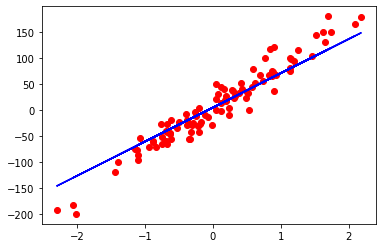

In [ ]:
# 0 ) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state = 1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# reshape to have each value in one row (as a column vector)
y = y.view(y.shape[0], 1) # new size

n_samples, n_features = X.shape

# 1) model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


# 3) training loop
num_epochs = 100
for epochs in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()


# Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# 0 ) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

# scale -> always recommended to do when we deal with Logistic Regression
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) model
# f = wx + b, sigmoid at the end for Logistic Regression
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


# 3) training loop
num_epochs = 100
for epochs in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')


epoch: 100, loss = 0.8554
epoch: 100, loss = 0.8270
epoch: 100, loss = 0.8003
epoch: 100, loss = 0.7752
epoch: 100, loss = 0.7516
epoch: 100, loss = 0.7294
epoch: 100, loss = 0.7085
epoch: 100, loss = 0.6889
epoch: 100, loss = 0.6704
epoch: 100, loss = 0.6530
epoch: 100, loss = 0.6366
epoch: 100, loss = 0.6211
epoch: 100, loss = 0.6065
epoch: 100, loss = 0.5927
epoch: 100, loss = 0.5796
epoch: 100, loss = 0.5672
epoch: 100, loss = 0.5555
epoch: 100, loss = 0.5443
epoch: 100, loss = 0.5337
epoch: 100, loss = 0.5236
epoch: 100, loss = 0.5140
epoch: 100, loss = 0.5048
epoch: 100, loss = 0.4960
epoch: 100, loss = 0.4877
epoch: 100, loss = 0.4796
epoch: 100, loss = 0.4720
epoch: 100, loss = 0.4646
epoch: 100, loss = 0.4575
epoch: 100, loss = 0.4508
epoch: 100, loss = 0.4442
epoch: 100, loss = 0.4380
epoch: 100, loss = 0.4319
epoch: 100, loss = 0.4261
epoch: 100, loss = 0.4205
epoch: 100, loss = 0.4151
epoch: 100, loss = 0.4099
epoch: 100, loss = 0.4049
epoch: 100, loss = 0.4000
epoch: 100, 

# Dataset and DataLoader - Batch Training
 

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
%cd /content/drive/MyDrive/pytorch-tutorial

/content/drive/MyDrive/pytorch-tutorial


In [ ]:
class WineDataset(Dataset):
  def __init__(self):
    # data loading
    xy = np.loadtxt('./data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows =1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
    self.n_samples = xy.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]


  def __len__(self):
    return self.n_samples


dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data

dataloader = DataLoader(dataset=dataset, batch_size = 4, shuffle = True, num_workers = 2)

dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
print(features, labels)

# training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / 4) # divided by the batch_size
print(total_samples, n_iterations)

for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    # forward backward update
    if (i+1) % 5 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1} / {n_iterations}, inputs {inputs.shape}')

tensor([[1.3730e+01, 4.3600e+00, 2.2600e+00, 2.2500e+01, 8.8000e+01, 1.2800e+00,
         4.7000e-01, 5.2000e-01, 1.1500e+00, 6.6200e+00, 7.8000e-01, 1.7500e+00,
         5.2000e+02],
        [1.2000e+01, 1.5100e+00, 2.4200e+00, 2.2000e+01, 8.6000e+01, 1.4500e+00,
         1.2500e+00, 5.0000e-01, 1.6300e+00, 3.6000e+00, 1.0500e+00, 2.6500e+00,
         4.5000e+02],
        [1.1820e+01, 1.7200e+00, 1.8800e+00, 1.9500e+01, 8.6000e+01, 2.5000e+00,
         1.6400e+00, 3.7000e-01, 1.4200e+00, 2.0600e+00, 9.4000e-01, 2.4400e+00,
         4.1500e+02],
        [1.4100e+01, 2.1600e+00, 2.3000e+00, 1.8000e+01, 1.0500e+02, 2.9500e+00,
         3.3200e+00, 2.2000e-01, 2.3800e+00, 5.7500e+00, 1.2500e+00, 3.1700e+00,
         1.5100e+03]]) tensor([[3.],
        [2.],
        [2.],
        [1.]])
178 45
epoch 1/2, step 5 / 45, inputs torch.Size([4, 13])
epoch 1/2, step 10 / 45, inputs torch.Size([4, 13])
epoch 1/2, step 15 / 45, inputs torch.Size([4, 13])
epoch 1/2, step 20 / 45, inputs torch.Size([

# Dataset Transforms

In [ ]:
import torch
import torchvision

In [ ]:
dataset = torchvision.datasets.MNIST(
    root = './data', download = True, transform = torchvision.transforms.ToTensor()
)

class WineDataset(Dataset):
  def __init__(self, transform=None):
    # data loading
    xy = np.loadtxt('./data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows =1)
    self.x = xy[:, 1:]
    self.y = xy[:, [0]] # n_samples, 1
    self.n_samples = xy.shape[0]

    self.transform = transform

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    
    return sample

  def __len__(self):
    return self.n_samples

class ToTensor:
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)


class MulTransform:
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, sample):
    inputs, target = sample
    inputs *= self.factor
    return inputs, target 


dataset = WineDataset(transform = ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform = composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


# Softmax and Cross-Entropy

Multiclass Classification: Softmax returns probabilities between 0 and 1. Sum of the probabilities returns 1.

Multiclass Classification: Crossentropy (loss) measures the performance of a multi-class problem. Loss increases as the predicted probability diverges from the true label. The loss will be often used in compatibility with the Softmax function.

*   Y labels must be one-hot encoded class labels
*   Y_predicted labels are probabilities (Softmax).

Binary Classification: use the Sigmoid function in the end of a neural network.

Binary Classification: use the binary cross entropyloss sigmoid.



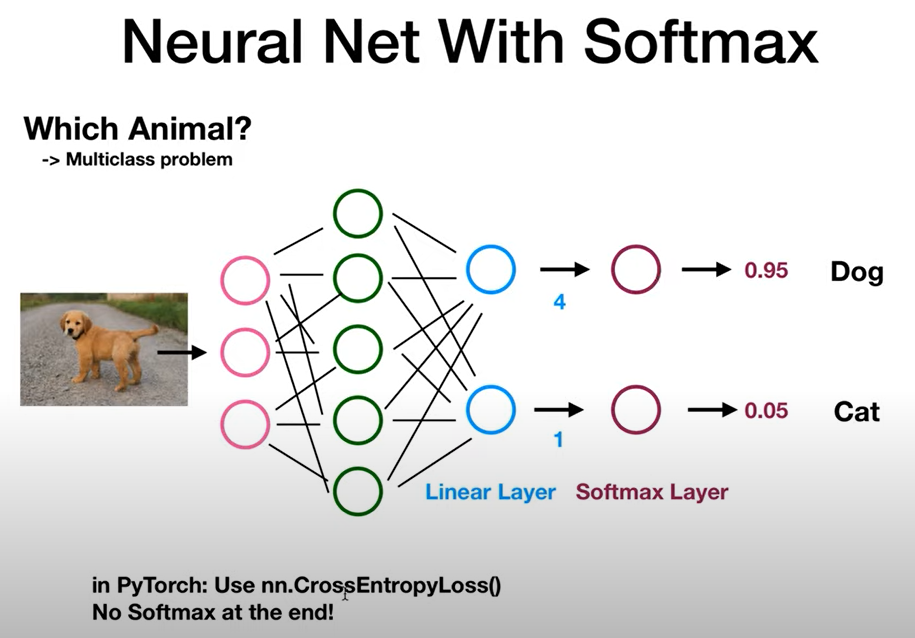

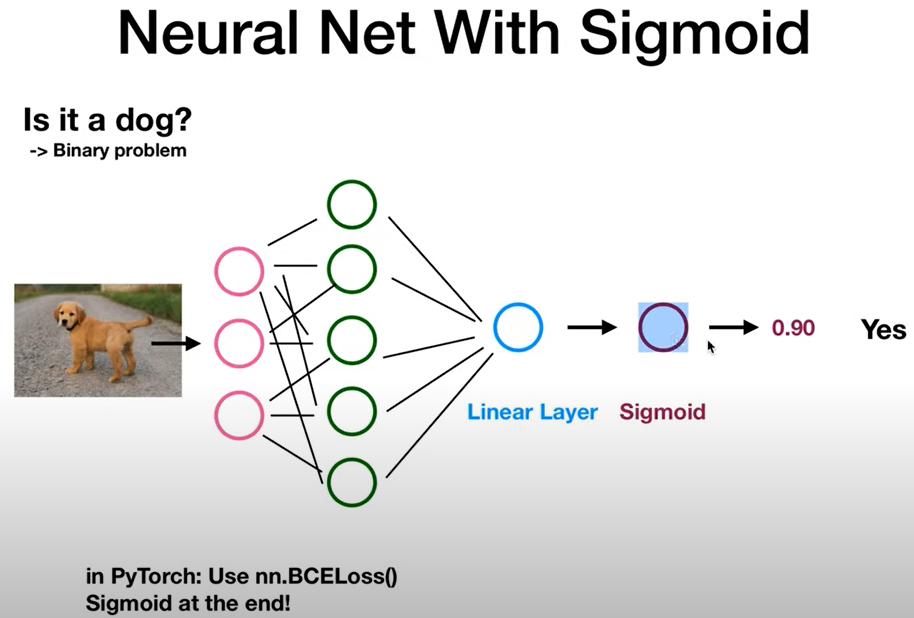

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis = 0)

def cross_entropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss # / float(predicted.shape[0]) to normalize

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim = 0)
print('softmax torch:', outputs)

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])

# y_pred has probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

# be careful the CEL applies the logSoftmax and nLL loss -> don't implement Softmax in last layer
# y must not be one-hot encoded
# y_pred has raw scores (logits) no Softmax
loss = nn.CrossEntropyLoss()

# 3 samples
Y = torch.tensor([2, 0, 1])
# nsamples x nclasses = 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]]) # raw values: no softmax applied
Y_pred_bad = torch.tensor([[2.1, 1.0, 2.1], [0.1, 1.0, 0.1], [0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'Loss1 torch: {l1.item():.4f}')
print(f'Loss2 torch: {l2.item():.4f}')

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1)
print(predictions2)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
Loss1 torch: 0.3018
Loss2 torch: 0.8155
tensor([2, 0, 1])
tensor([0, 1, 1])


In [ ]:
# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

# Activation Functions

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        y_pred = torch.sigmoid(out)
        return y_pred

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        # F.leaky_relu() only available in this API call not as torch.leaky_relu()
        out = torch.relu(self.linear1(x))
        y_pred = torch.sigmoid(self.linear2(out))
        return y_pred


# Feed-Forward Neural Network

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



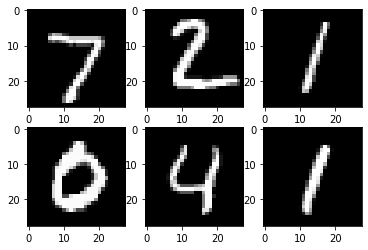

Epoch [1/2], Step [100/600], Loss: 0.2618
Epoch [1/2], Step [200/600], Loss: 0.2311
Epoch [1/2], Step [300/600], Loss: 0.2176
Epoch [1/2], Step [400/600], Loss: 0.1282
Epoch [1/2], Step [600/600], Loss: 0.1646
Epoch [2/2], Step [100/600], Loss: 0.0402
Epoch [2/2], Step [200/600], Loss: 0.0732
Epoch [2/2], Step [300/600], Loss: 0.0734
Epoch [2/2], Step [400/600], Loss: 0.0908
Epoch [2/2], Step [500/600], Loss: 0.0853
Epoch [2/2], Step [600/600], Loss: 0.1424
Accuracy of the network on the 10000 test images: 97.15 %


In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()
# torch.Size([100, 1, 28, 28]) batch_size, 1 channel, img_array 28x28

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray') # access the first channel and define colormap
plt.show()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss() # applies softmax for us
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  # loop over the batches
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')


# CNNs

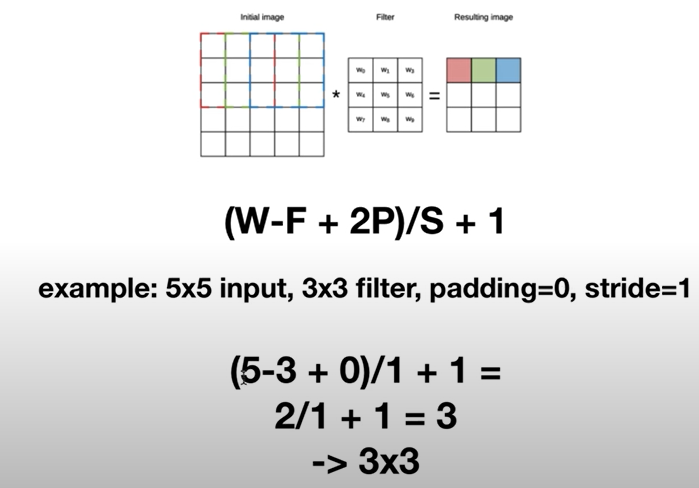

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


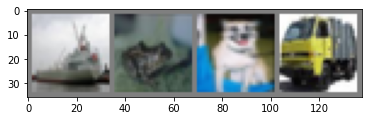

Epoch [1/5], Step [2000/12500], Loss: 2.3272
Epoch [1/5], Step [4000/12500], Loss: 2.2612
Epoch [1/5], Step [6000/12500], Loss: 2.2790
Epoch [1/5], Step [8000/12500], Loss: 2.2953
Epoch [1/5], Step [10000/12500], Loss: 2.2431
Epoch [1/5], Step [12000/12500], Loss: 2.1965
Epoch [2/5], Step [2000/12500], Loss: 2.0765
Epoch [2/5], Step [4000/12500], Loss: 2.1376
Epoch [2/5], Step [6000/12500], Loss: 2.2602
Epoch [2/5], Step [8000/12500], Loss: 1.9832
Epoch [2/5], Step [10000/12500], Loss: 1.8433
Epoch [2/5], Step [12000/12500], Loss: 1.4613
Epoch [3/5], Step [2000/12500], Loss: 1.2805
Epoch [3/5], Step [4000/12500], Loss: 1.7683
Epoch [3/5], Step [6000/12500], Loss: 2.2323
Epoch [3/5], Step [8000/12500], Loss: 1.7921
Epoch [3/5], Step [10000/12500], Loss: 2.3791
Epoch [3/5], Step [12000/12500], Loss: 1.6249
Epoch [4/5], Step [2000/12500], Loss: 1.8263
Epoch [4/5], Step [4000/12500], Loss: 1.4433
Epoch [4/5], Step [6000/12500], Loss: 1.1330
Epoch [4/5], Step [8000/12500], Loss: 1.7431
Epoc

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # input size: [4, 3, 32, 32]
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 color channels input, # 6 output layers, # filter 5x5
        # outsize: [4, 6, 28, 28] (32-5+2*0)/1 + 1 = 28
        self.pool = nn.MaxPool2d(2, 2) # size 2, stride = 2
        # outsize: [4, 6, 14, 14] (28-2+2*0)/2 + 1 = 14
        self.conv2 = nn.Conv2d(6, 16, 5)
        # outsize: [4, 16, 10, 10] (14-5+2*0)/1 + 1 = 10
        # another pooling layer applied before linear layer
        # outsize: [4, 16, 5, 5] (10-2+2*0)/2 + 1 = 5
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # flatten 3D Tensor to 1D Tensor
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # 10 output classes

    def forward(self, x):
        # -> n, 3, 32, 32 (n = batch_size = 4)
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')



# Transfer Learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [ ]:
# ImageFolder
# Scheduler: to change the learning rate
# Transfer Learning

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
# needs to have the following data structure:
# - data/hymenoptera_data
#       - train
#          - class 1
#          - class 2
#       - val
#          - class 1
#          - class 2

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)


def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features 
# get the number of input features from the last layer
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2) # new fully connected layer (overwrite the pretrained one)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)


#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

# TensorBoard

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys
from torch.utils.tensorboard import SummaryWriter


Epoch [1/1], Step [100/938], Loss: 0.3905
Epoch [1/1], Step [200/938], Loss: 0.3077
Epoch [1/1], Step [300/938], Loss: 0.3736
Epoch [1/1], Step [400/938], Loss: 0.1255
Epoch [1/1], Step [500/938], Loss: 0.1989
Epoch [1/1], Step [600/938], Loss: 0.2159
Epoch [1/1], Step [700/938], Loss: 0.1300
Epoch [1/1], Step [800/938], Loss: 0.3115
Epoch [1/1], Step [900/938], Loss: 0.1091
Accuracy of the network on the 10000 test images: 96.28 %


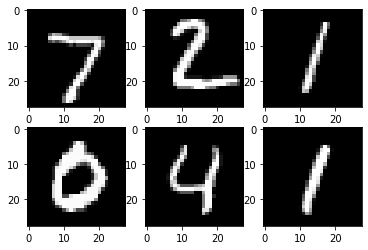

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

############## TENSORBOARD ########################
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist1')
###################################################

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
#plt.show()

############## TENSORBOARD ########################
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.close()
#sys.exit()
###################################################

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

############## TENSORBOARD ########################
writer.add_graph(model, example_data.reshape(-1, 28*28))
#writer.close()
#sys.exit()
###################################################

# Train the model
running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            ############## TENSORBOARD ########################
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0
            ###################################################

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(predicted)

    # 10000, 10, and 10000, 1
    # stack concatenates tensors along a new dimension
    # cat concatenates tensors in the given dimension
    class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
    class_labels = torch.cat(class_labels)

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    ############## TENSORBOARD ########################
    classes = range(10)
    for i in classes:
        labels_i = class_labels == i
        preds_i = class_preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()
    ###################################################

# Saving and Loading Models

In [1]:
import torch
import torch.nn as nn

''' 3 DIFFERENT METHODS TO REMEMBER:
 - torch.save(arg, PATH) # can be model, tensor, or dictionary
 - torch.load(PATH)
 - torch.load_state_dict(arg)
 - model.load_state_dict(arg)
'''

''' 2 DIFFERENT WAYS OF SAVING
# 1) lazy way: save whole model
torch.save(model, PATH)
-> results are serialized (pickle file) and not human readable

# model class must be defined somewhere
model = torch.load(PATH)
model.eval()

# 2) recommended way: save only the state_dict
torch.save(model.state_dict(), PATH)

# model must be created again with parameters
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
'''


class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)
# train your model...

####################save all ######################################
for param in model.parameters():
    print(param)

# save and load entire model

FILE = "model.pth" # short for pytorch
torch.save(model, FILE)

loaded_model = torch.load(FILE)
loaded_model.eval()

for param in loaded_model.parameters():
    print(param)


############save only state dict #########################

# save only state dict
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

print(model.state_dict())
loaded_model = Model(n_input_features=6) # first define the model again
loaded_model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()

print(loaded_model.state_dict())


###########load checkpoint#####################
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

checkpoint = {
"epoch": 90,
"model_state": model.state_dict(),
"optim_state": optimizer.state_dict()
}
print(optimizer.state_dict())
FILE = "checkpoint.pth"
torch.save(checkpoint, FILE)

model = Model(n_input_features=6)
optimizer = torch.optim.SGD(model.parameters(), lr=0)

checkpoint = torch.load(FILE)
model.load_state_dict(checkpoint['model_state']) # loads all the parameters
optimizer.load_state_dict(checkpoint['optim_state']) 
epoch = checkpoint['epoch']
print(optimizer.state_dict())
# continue training

model.eval()
# - or -
# model.train()

print(optimizer.state_dict())

# Remember that you must call model.eval() to set dropout and batch normalization layers 
# to evaluation mode before running inference. Failing to do this will yield 
# inconsistent inference results. If you wish to resuming training, 
# call model.train() to ensure these layers are in training mode.

""" SAVING ON GPU/CPU 

# 1) Save on GPU, Load on CPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

device = torch.device('cpu')
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location=device))

# 2) Save on GPU, Load on GPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device)

# Note: Be sure to use the .to(torch.device('cuda')) function 
# on all model inputs, too!

# 3) Save on CPU, Load on GPU
torch.save(model.state_dict(), PATH)

device = torch.device("cuda")
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location="cuda:0"))  # Choose whatever GPU device number you want
model.to(device)

# This loads the model to a given GPU device. 
# Next, be sure to call model.to(torch.device('cuda')) to convert the model’s parameter tensors to CUDA tensors
"""



Parameter containing:
tensor([[-0.3454,  0.1454, -0.1712,  0.2623, -0.1563,  0.2796]],
       requires_grad=True)
Parameter containing:
tensor([-0.2082], requires_grad=True)
Parameter containing:
tensor([[-0.3454,  0.1454, -0.1712,  0.2623, -0.1563,  0.2796]],
       requires_grad=True)
Parameter containing:
tensor([-0.2082], requires_grad=True)
OrderedDict([('linear.weight', tensor([[-0.3454,  0.1454, -0.1712,  0.2623, -0.1563,  0.2796]])), ('linear.bias', tensor([-0.2082]))])
OrderedDict([('linear.weight', tensor([[-0.3454,  0.1454, -0.1712,  0.2623, -0.1563,  0.2796]])), ('linear.bias', tensor([-0.2082]))])
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1]}]}
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1]}]}
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'pa

' SAVING ON GPU/CPU \n\n# 1) Save on GPU, Load on CPU\ndevice = torch.device("cuda")\nmodel.to(device)\ntorch.save(model.state_dict(), PATH)\n\ndevice = torch.device(\'cpu\')\nmodel = Model(*args, **kwargs)\nmodel.load_state_dict(torch.load(PATH, map_location=device))\n\n# 2) Save on GPU, Load on GPU\ndevice = torch.device("cuda")\nmodel.to(device)\ntorch.save(model.state_dict(), PATH)\n\nmodel = Model(*args, **kwargs)\nmodel.load_state_dict(torch.load(PATH))\nmodel.to(device)\n\n# Note: Be sure to use the .to(torch.device(\'cuda\')) function \n# on all model inputs, too!\n\n# 3) Save on CPU, Load on GPU\ntorch.save(model.state_dict(), PATH)\n\ndevice = torch.device("cuda")\nmodel = Model(*args, **kwargs)\nmodel.load_state_dict(torch.load(PATH, map_location="cuda:0"))  # Choose whatever GPU device number you want\nmodel.to(device)\n\n# This loads the model to a given GPU device. \n# Next, be sure to call model.to(torch.device(\'cuda\')) to convert the model’s parameter tensors to CUDA 